In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special

# Generic functions

### Generic walk function

In [2]:
def walk(effective_jump,n):
    position = 0
    trajectory = np.zeros(n+1)
    for m in range(n-1):
        position += effective_jump(position,m,n)
        trajectory[m+1] = position
    return trajectory

### Generic Acceptance-rejection function

In [3]:
def effective_jump_ARS(free_jump,acceptance_probability,position,m,n):
    p_accept = 0
    while np.random.rand() > p_accept:
        eta = free_jump()
        p_accept = acceptance_probability(position,eta,m,n)
    return eta

# Bridge random walks

## Lattice bridge random walk 

In [4]:
def effective_jump_lattice(position,m,n):
    p_right = 1/2*(1-position/(n-m))
    if np.random.rand() < p_right:
        return +1
    else:
        return -1

In [5]:
n = 10
trajectory_lattice = walk(effective_jump_lattice,n)

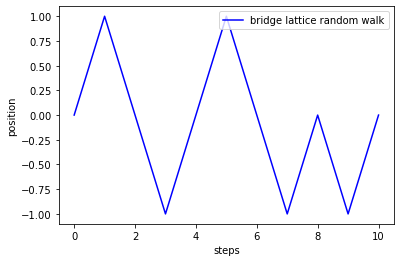

In [6]:
plt.plot(trajectory_lattice,'b',label='bridge lattice random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

## Gaussian bridge random walk

### Direct sampling

In [7]:
def effective_jump(position,m,n):
    mu = -position/(n-m)
    sigma = np.sqrt((n-m-1)/(n-m))
    return mu + sigma * np.random.randn()

In [8]:
n = 10
trajectory = walk(effective_jump,n)

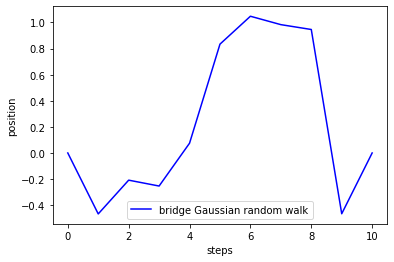

In [9]:
plt.plot(trajectory,'b',label='bridge Gaussian random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

### Acceptance-rejection sampling

In [10]:
def free_jump():
    return np.random.randn()
def acceptance_probability(position,eta,m,n):
    return np.exp(-(position+eta)**2/(2*(n-m-1)))
def effective_jump(position,m,n):
    return effective_jump_ARS(free_jump,acceptance_probability,position,m,n)

In [11]:
n = 10
trajectory = walk(effective_jump,n)

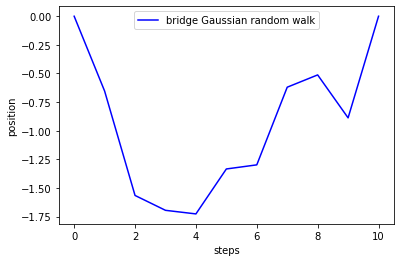

In [12]:
plt.plot(trajectory,'b',label='bridge Gaussian random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

## Cauchy bridge random walk

In [13]:
def free_jump():
    return np.random.standard_cauchy()
def acceptance_probability(position,eta,m,n):
    return 1/(1+((position+eta)/(n-m))**2)
def effective_jump(position,m,n):
    return effective_jump_ARS(free_jump,acceptance_probability,position,m,n)

In [14]:
n = 10
trajectory = walk(effective_jump,n)

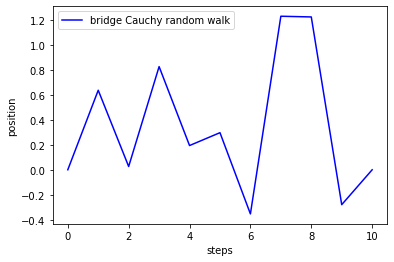

In [15]:
plt.plot(trajectory,'b',label='bridge Cauchy random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

## Student bridge random walk

In [25]:
def accept_prob_cache(n):
    ''' computes the acceptance probability in advance for various space-time points for a bridge of length n'''
    ''' returns the positions and corresponding acceptance probability'''
    
    Lambda = 10 # upper cut-off for the Fourier inversion
    num_points = 1000000 # number of points for the Fourier inversion
    
    # integration domain for the Fourier inversion
    points = np.arange(num_points)    
    k = points/num_points*Lambda+1e-12 
    
    # position in space domain
    x_points = 2*np.pi*points[:num_points//2]/Lambda
    
    # acceptance probability 
    accept_proba_points = np.zeros([n+1,num_points//2])
    
    # compute the Fourier inversion
    for m in range(n+1):
        temp = (np.exp(-np.sqrt(3)*k)*(np.sqrt(3)*k+1))**m
        fft = Lambda*np.real(np.fft.ifft(temp))
        fft = fft/fft[0]
        accept_proba_points[m,:]=fft[:len(fft)//2]
    
    return x_points, accept_proba_points

In [22]:
def free_jump():
    return np.random.standard_t(3)
def acceptance_probability(position,eta,m,n):
    return np.interp(np.abs(position+eta),x_points, accept_proba_points[n-m,:])
def effective_jump(position,m,n):
    return effective_jump_ARS(free_jump,acceptance_probability,position,m,n)

In [26]:
n = 10
x_points, accept_proba_points = accept_prob_cache(n)
trajectory = walk(effective_jump,n)

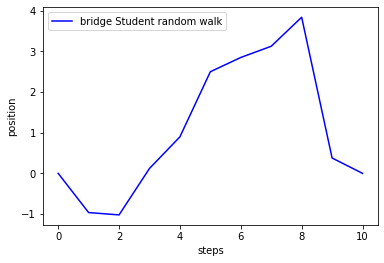

In [27]:
plt.plot(walk(effective_jump,n),'b',label='bridge Student random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

# Excursion random walks

## Lattice excursion random walk

In [28]:
def effective_jump(position,m,n):
    p_right = 1/2*(1+(n-m-position*(position+2))/((position+1)*(n-m)))
    if np.random.rand() < p_right:
        return 1
    else:
        return -1

In [29]:
n = 10
trajectory = walk(effective_jump,n)

Text(0, 0.5, 'position')

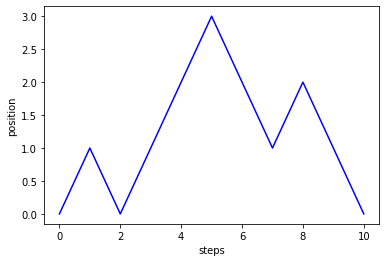

In [30]:
plt.plot(trajectory,'b',label='excursion lattice random walk')
plt.xlabel('steps')
plt.ylabel('position')

# Meander random walks

## Lattice meander random walk

In [35]:
def Q(x,x0,m):
    return (special.comb(m, (m+x-x0)/2)-special.comb(m, (m+x+2+x0)/2))*2**(-m)
def surv(x0,m):
    s = 0
    for x in range(x0+m,max(x0-m,0)-1,-2):
        s += Q(x,x0,m)
    return s

In [36]:
def effective_jump(position,m,n):
    pright = surv(position+1,n-m-1)/(2*surv(position,n-m))
    if np.random.rand() < pright:
        return 1
    else:
        return -1

In [37]:
n = 10
trajectory = walk(effective_jump,n+1)
trajectory = trajectory[:-1]

Text(0, 0.5, 'position')

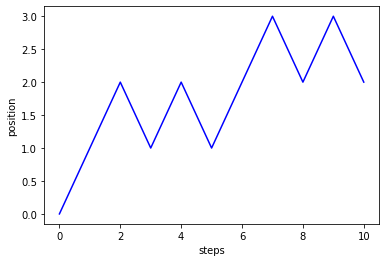

In [38]:
plt.plot(trajectory,'b',label='meander lattice random walk')
plt.xlabel('steps')
plt.ylabel('position')